## Sara nr labb 2

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import chart_studio as cs
import mplcursors
import plotly_express as px
import os
import plotly.express as px
cs.tools.set_credentials_file

na_filter=False # Filter detect missing value markers



* Start by reading the file riket2023_åk9_np.xlsx and sheets for the various subjects. Change the column names on
* respective dataframe and cleaning from null. The info i find i LP


In [173]:
class DataReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self, sheet_name):
        df = pd.read_excel(self.file_path, sheet_name=sheet_name)
        df.columns = ["plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", 
                      "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", 
                      "Flickor (poäng)", "Pojkar (poäng)"]
        df = df.dropna()
        return df

# Skapa en instans av DataReader-klassen med filvägen till Excel-filen
data_reader = DataReader("riket2023_åk9_np.xlsx")

# Använd metoden för att läsa in data från olika ark
df_matematik = data_reader.read_data("Matematik")
df_engelska = data_reader.read_data("Engelska")
df_svenska = data_reader.read_data("Svenska")
df_svenska_som_andraspråk = data_reader.read_data("Svenska som andraspråk")   
df_matematik

,plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
7,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
8,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
9,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
10,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
11,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


 Get the number of student who got F in math

* Find out the total number of F's in math, boys and girls respectively.

I learned how important it is to keep track of the correct index in order to calculate the correct value. I learned a lot from this website.https://pandas.pydata.org/docs/user_guide/indexing.html#looking-up-values-by-index-column-labels

In [174]:
# Beräkna antalet flickor och pojkar som fått F i matematik 
flickor_f_matematik = df_matematik.iloc[1]["Flickor (A-F)"]-round(df_matematik.iloc[1]["Flickor (A-F)"] * df_matematik.iloc[1]["Flickor (A-E)"]/100) 

#pojkar som har fått F i matematik
pojkar_f_matematik = df_matematik.iloc[1]["Pojkar (A-F)"] - round(df_matematik.iloc[1]["Pojkar (A-E)"] * df_matematik.iloc[1]["Pojkar (A-F)"]/100) 

#totalt antal elever som fick F
totalt_f_matematik = round(flickor_f_matematik + pojkar_f_matematik)

print(f"Totalt antal flickor som fick F var: {flickor_f_matematik}")
print(f"Totalt antal pojkar som fick F var: {pojkar_f_matematik}")
print(f"Totalt antal elever som fick F var: {totalt_f_matematik}")

Totalt antal flickor som fick F var: 5825
Totalt antal pojkar som fick F var: 5798
Totalt antal elever som fick F var: 11623


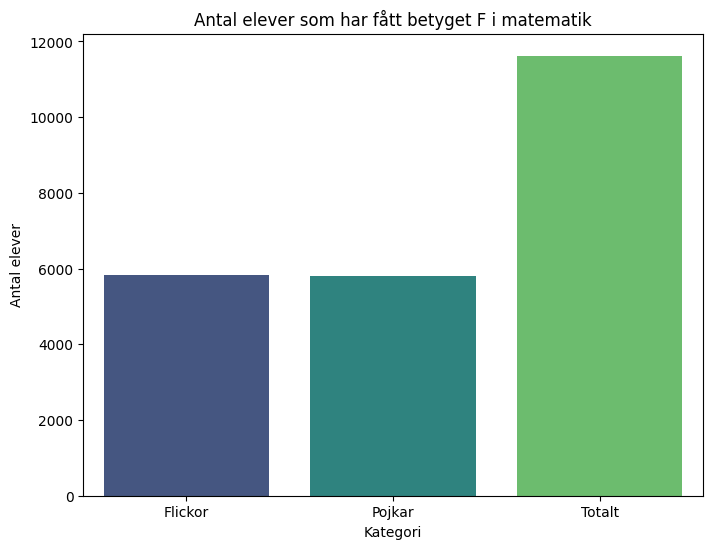

In [175]:
#Stapeldiagram för elever som fick F i Matematik
data = {
    "Kategori": ["Flickor", "Pojkar", "Totalt"],
    "Antal": [flickor_f_matematik, pojkar_f_matematik, totalt_f_matematik]
}
df_visualisering = pd.DataFrame(data)

# Skapa ett barplot med Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Kategori", y="Antal", data=df_visualisering, hue="Kategori", palette="viridis", legend=False)
plt.title("Antal elever som har fått betyget F i matematik")
plt.xlabel("Kategori")
plt.ylabel("Antal elever")
plt.savefig('visualiseringar/antal_elever_med_f_i_betyg.png')
plt.show()

Draw a bar graph of the total points for the different subjects.

# Skapa grafer för varje enskild huvudman 

Jag insåg att när jag skapade beräkningen för skolverket poäng så fick jag felmedelande för att ".." och "~" finns med i beräkningen på svenska som andra spårk. Så jag skapar en metod för att omvandla ".." och "~" till 0  

In [176]:
# Ersätt ".." och "~" med 0 i varje DataFrame
df_engelska.replace({"..": 0, "~": 0}, inplace=True)
df_matematik.replace({"..": 0, "~": 0}, inplace=True)
df_svenska.replace({"..": 0, "~": 0}, inplace=True)
df_svenska_som_andraspråk.replace({"..": 0, "~": 0}, inplace=True)

Titel: Betygsgenomsnittspoäng per huvudman. Jag lägger ihop de olika betygspoängen för att kunna skapa en graf. 

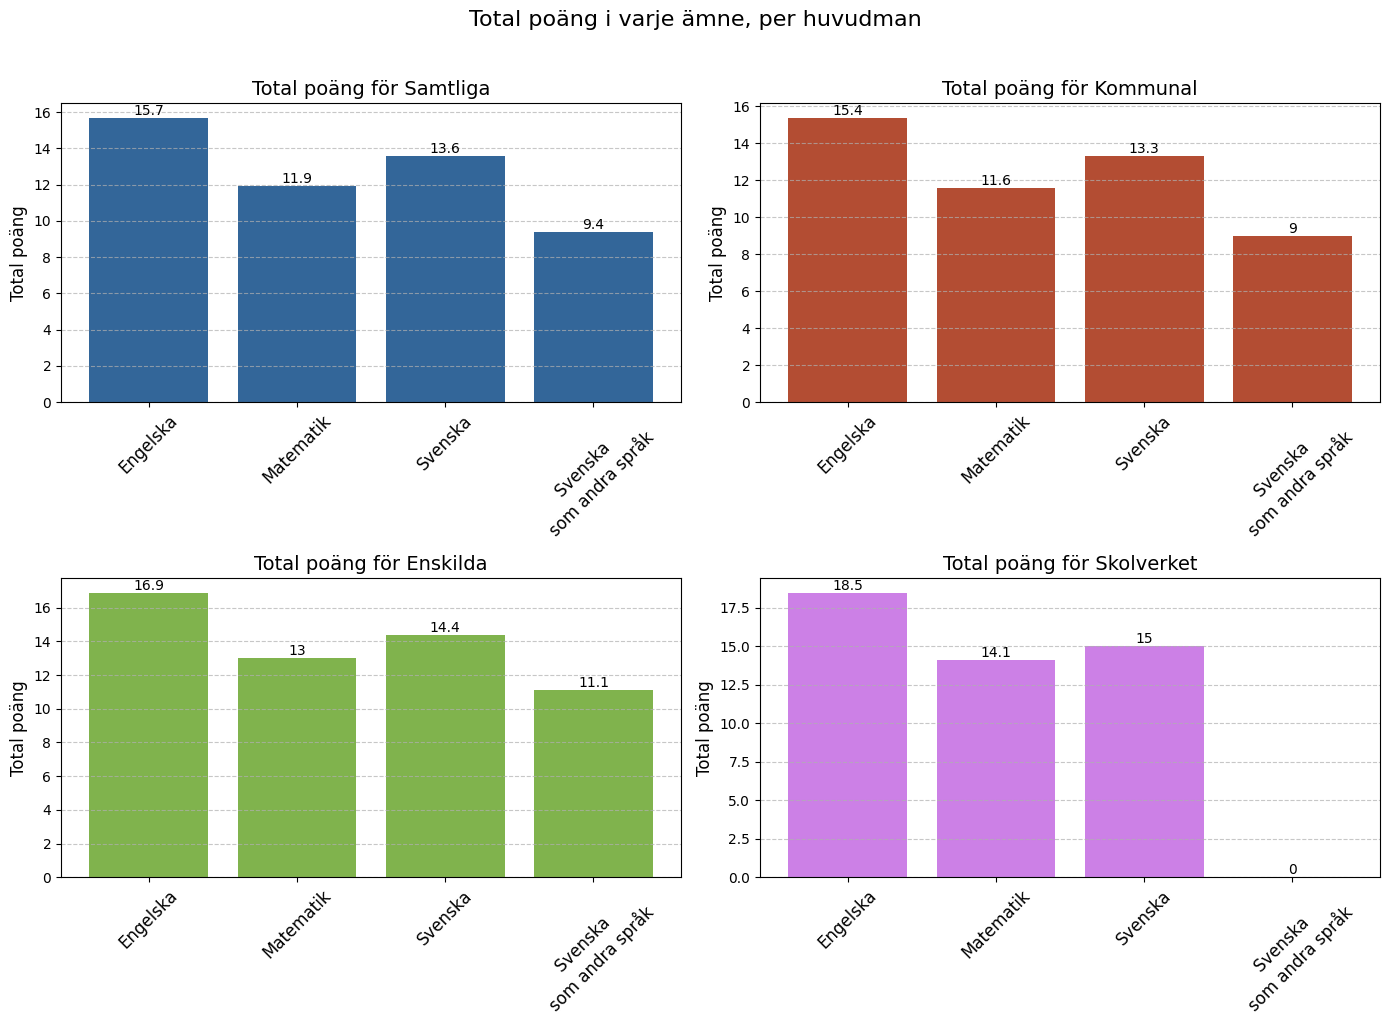

[15.7, 15.4, 16.9, 18.5]

In [177]:
# Lista med huvudmän
Huvudmän = ["Samtliga","Kommunal", "Enskilda", "Skolverket"]

# Ersätt ".." och "~" med 0 i varje DataFrame
df_engelska.replace({"..": 0, "~": 0}, inplace=True)
df_matematik.replace({"..": 0, "~": 0}, inplace=True)
df_svenska.replace({"..": 0, "~": 0}, inplace=True)
df_svenska_som_andraspråk.replace({"..": 0, "~": 0}, inplace=True)

# Beräkna totalpoäng för varje ämne och huvudman separat
engelska_poäng = [
    df_engelska.iloc[1]["Totalt (poäng)"],
    df_engelska.iloc[2]["Totalt (poäng)"],
    df_engelska.iloc[3]["Totalt (poäng)"],
    df_engelska.iloc[4]["Totalt (poäng)"]
]

matematik_poäng = [
    df_matematik.iloc[1]["Totalt (poäng)"],
    df_matematik.iloc[2]["Totalt (poäng)"],
    df_matematik.iloc[3]["Totalt (poäng)"],
    df_matematik.iloc[4]["Totalt (poäng)"]
]

svenska_poäng = [
    df_svenska.iloc[1]["Totalt (poäng)"],
    df_svenska.iloc[2]["Totalt (poäng)"],
    df_svenska.iloc[3]["Totalt (poäng)"],
    df_svenska.iloc[4]["Totalt (poäng)"]
]

svenska_som_andraspråk_poäng = [
    df_svenska_som_andraspråk.iloc[1]["Totalt (poäng)"],
    df_svenska_som_andraspråk.iloc[2]["Totalt (poäng)"],
    df_svenska_som_andraspråk.iloc[3]["Totalt (poäng)"],
    df_svenska_som_andraspråk.iloc[4]["Totalt (poäng)"]
]

# Skapa subplotfigur med 2 rader och 2 kolumner
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Justera titeln på hela figuren
fig.suptitle("Total poäng i varje ämne, per huvudman", fontsize=16, y=1.02)

x = np.arange(len(Huvudmän))  # Skapa en serie av index för varje ämne

# Färger för staplarna
colors = [(0.2, 0.4, 0.6), (0.7, 0.3, 0.2), (0.5, 0.7, 0.3), (0.8, 0.5, 0.9)]
                      
# Rita stapeldiagram för varje huvudman
for i, ax in enumerate(axes.flat):
    # Hämta respektive ämnes poäng
    poäng = [engelska_poäng[i], matematik_poäng[i], svenska_poäng[i], svenska_som_andraspråk_poäng[i]]
    bars = ax.bar(x, poäng, color=colors[i])
    ax.set_title("Total poäng för {}".format(Huvudmän[i]), fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(["Engelska","Matematik","Svenska", "Svenska \nsom andra språk"], fontsize=12, rotation=45)  # Använd ämnenen som etiketter på x-axeln och rotera dem med 45 grader
    ax.set_ylabel("Total poäng", fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)  # Lägg till ett strecklat rutnät på y-axeln

    # Lägg till etiketter på staplarna
    ax.bar_label(bars, fontsize=10)

    # Anslut staplarna till mplcursors
    mplcursors.cursor(bars, hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

plt.tight_layout()

# Spara figuren som en bild i mappen "visualiseringar"
plt.savefig('visualiseringar/total_poäng_per_ämne.png')
plt.show()
engelska_poäng



Uppgift 1 - uppvärmning betyg och prov /n
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

2 / 2
b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.
c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

In [178]:
class DataReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self, sheet_name):
        df = pd.read_excel(self.file_path, sheet_name=sheet_name)
        df = df.dropna()
        return df
    
# Skapa en instans av DataReader-klassen med filvägen till Excel-filen
data_reader = DataReader("betyg_o_prov_riksnivå.xlsx")

# Använd metoden för att läsa in data från Tabell 1B
df_Tabell_1B = data_reader.read_data("Tabell 1B")

# Välj rätt rader och kolumner för totalt, flickor och pojkar för läsår 18-23
selected_data_totalt = df_Tabell_1B.iloc[0:5, [0, 7]]  # Rader 0:5, Kolumn 1 (Totalt)
selected_data_flickor = df_Tabell_1B.iloc[0:5, [0, 8]]  # Rader 0:5, Kolumn 2 (Flickor)
selected_data_pojkar = df_Tabell_1B.iloc[0:5, [0, 9]]  # Rader 0:5, Kolumn 3 (Pojkar)

# Byt namn på kolumnerna för att de ska matcha i samma DataFrame
selected_data_totalt = selected_data_totalt.rename(columns={selected_data_totalt.columns[0]: 'Läsår', selected_data_totalt.columns[1]: 'Andel (%) elever som saknar godkänt betyg (Totalt)'})
selected_data_flickor = selected_data_flickor.rename(columns={selected_data_flickor.columns[0]: 'Läsår', selected_data_flickor.columns[1]: 'Andel (%) elever som saknar godkänt betyg (Flickor)'})
selected_data_pojkar = selected_data_pojkar.rename(columns={selected_data_pojkar.columns[0]: 'Läsår', selected_data_pojkar.columns[1]: 'Andel (%) elever som saknar godkänt betyg (Pojkar)'})

# Plotta linjediagrammet med alla tre värden
fig = px.line(title='Andel (%) elever som saknar godkänt betyg i ett, flera eller alla ämnen (Totalt, Flickor, Pojkar)')
fig.add_scatter(x=selected_data_totalt['Läsår'], y=selected_data_totalt['Andel (%) elever som saknar godkänt betyg (Totalt)'], mode='lines', name='Total')
fig.add_scatter(x=selected_data_flickor['Läsår'], y=selected_data_flickor['Andel (%) elever som saknar godkänt betyg (Flickor)'], mode='lines', name='Flickor')
fig.add_scatter(x=selected_data_pojkar['Läsår'], y=selected_data_pojkar['Andel (%) elever som saknar godkänt betyg (Pojkar)'], mode='lines', name='Pojkar')
fig.write_html('visualiseringar/Andel_elever_med_ofullständigt_betyg.html')
fig.show()

#Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23

In [179]:
#Genomsnittligt meritvärde beräknat på 16 ämnen , flickor och pojkar för läsår 18-23

selected_data_totalt = df_Tabell_1B.iloc[0:5, [0, 1]]  # Rader 0:5, Kolumn 1 (Totalt)
selected_data_flickor = df_Tabell_1B.iloc[0:5, [0, 2]]  # Rader 0:5, Kolumn 2 (Flickor)
selected_data_pojkar = df_Tabell_1B.iloc[0:5, [0, 3]]  # Rader 0:5, Kolumn 3 (Pojkar)

selected_data_totalt.columns = ['Läsår', 'Genomsnittligt meritvärde beräknat på 16 ämnen (Totalt)']
selected_data_flickor.columns = ['Läsår', 'Genomsnittligt meritvärde beräknat på 16 ämnen (Flickor)']
selected_data_pojkar.columns = ['Läsår', 'Genomsnittligt meritvärde beräknat på 16 ämnen (Pojkar)']

# Plotta linjediagrammet med alla tre värden
fig = px.line(title='Genomsnittligt meritvärde beräknat på 16 ämnen (Totalt, Flickor, Pojkar)')
fig.add_scatter(x=selected_data_totalt['Läsår'], y=selected_data_totalt['Genomsnittligt meritvärde beräknat på 16 ämnen (Totalt)'], mode='lines', name='Total')
fig.add_scatter(x=selected_data_flickor['Läsår'], y=selected_data_flickor['Genomsnittligt meritvärde beräknat på 16 ämnen (Flickor)'], mode='lines', name='Flickor')
fig.add_scatter(x=selected_data_pojkar['Läsår'], y=selected_data_pojkar['Genomsnittligt meritvärde beräknat på 16 ämnen (Pojkar)'], mode='lines', name='Pojkar')
fig.write_html('visualiseringar/Genomsnittligt meritvärde beräknat på 16.html')
fig.show()

In [180]:
class DataReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self, sheet_name):
        df = pd.read_excel(self.file_path, sheet_name=sheet_name)
        df.columns = ["Läsår Huvudman Bakgrund", "Totalt (Meritvärde 16 ämnen)", "Flickor (Meritvärde 16 ämnen)", "Pojkar (Meritvärde 16 ämnen)", 
                      "Totalt (Meritvärde 17 ämnen)", "Flickor (Meritvärde 17 ämnen)", "Pojkar (Meritvärde 17 ämnen)", "Totalt (Andel elever som saknar godkänt betyg)", 
                      "Flickor (Andel elever som saknar godkänt betyg)", "Pojkar (Andel elever som saknar godkänt betyg)"]
        df = df.dropna()
        return df

# Skapa en instans av DataReader-klassen med filvägen till Excel-filen
data_reader = DataReader("betyg_o_prov_riksnivå.xlsx")

# Använd metoden för att läsa in data från olika ark
df_Tabell_1B = data_reader.read_data("Tabell 1B")

df_Tabell_1B

,Läsår Huvudman Bakgrund,Totalt (Meritvärde 16 ämnen),Flickor (Meritvärde 16 ämnen),Pojkar (Meritvärde 16 ämnen),Totalt (Meritvärde 17 ämnen),Flickor (Meritvärde 17 ämnen),Pojkar (Meritvärde 17 ämnen),Totalt (Andel elever som saknar godkänt betyg),Flickor (Andel elever som saknar godkänt betyg),Pojkar (Andel elever som saknar godkänt betyg)
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28
13,Kommun,216.1,225.6,207.2,223.6,233.8,214.1,28.9,27.4,30.3
14,Enskild,237.9,245,230.8,247.2,254.8,239.7,18.7,18.4,19
16,Allmän inriktning,238.5,245.8,231.2,247.9,255.7,240.1,18,17.7,18.3
17,Konfessionell,225.6,230.5,220.5,233.2,238.4,227.8,29.4,29.5,29.4
18,Waldorf,236.3,239,233.9,244.3,247.1,241.7,25.6,25.3,25.8


In [181]:

selected_data_kommunal = df_Tabell_1B[(df_Tabell_1B["Läsår Huvudman Bakgrund"] == 'Kommun')]
selected_data_enskild = df_Tabell_1B[(df_Tabell_1B["Läsår Huvudman Bakgrund"] == 'Enskild')]

# Skapa stapeldiagram för kommunal skolverksamhet
trace_kommunal = go.Bar(
    x=['Flickor (Meritvärde 16 ämnen)', "Flickor (Meritvärde 17 ämnen)", 'Flickor (Andel elever som saknar godkänt betyg)'],
    y=[selected_data_kommunal['Flickor (Meritvärde 16 ämnen)'].iloc[0], 
       selected_data_kommunal['Flickor (Meritvärde 17 ämnen)'].iloc[0], 
       selected_data_kommunal['Flickor (Andel elever som saknar godkänt betyg)'].iloc[0]],
    name='Kommunal',
    marker_color='rgb(55, 83, 109)'
)

# Skapa stapeldiagram för enskild skolverksamhet
trace_enskild = go.Bar(
    x=['Flickor (Meritvärde 16 ämnen)', "Flickor (Meritvärde 17 ämnen)", 'Flickor (Andel elever som saknar godkänt betyg)'],
    y=[selected_data_enskild['Flickor (Meritvärde 16 ämnen)'].iloc[0], 
       selected_data_enskild['Flickor (Meritvärde 17 ämnen)'].iloc[0], 
       selected_data_enskild['Flickor (Andel elever som saknar godkänt betyg)'].iloc[0]],
    name='Enskild',
    marker_color='rgb(26, 118, 255)'
)

# Definiera data som en lista av dina spår
data = [trace_kommunal, trace_enskild]

# Definiera layouten för din figur
layout = go.Layout(
    title='"Jämförelse mellan Kommunal och Enskild Skolverksamhet för 2022/23 \n' '\nVisar det bättre resultat för flickor i privatskolor jämfört med flickor i kommunala skolor, eller är resultaten endast en fasad?" ' ,
    barmode='group'
)

# Skapa en figur
fig = go.Figure(data=data, layout=layout)

# Visa figuren
fig.show()

fig.write_html('visualiseringar/Jämförelse mellan Kommunal och Enskild Skolverksamhet.html')


Jag väljer att undersöka missförhållande i skolan på detalnivå/besluts nivå samt nya ärenden och kostnader per elevhälsan på kommun nivå. Väljer man att lägga mer pengar på elevhälsan i budgeten året efter en anmälan är gjord? Tyvärr så finns bara kostnader för år 2022 så jag jämför anmälningar/beslut gjorda 2021

In [182]:
class DataReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self, sheet_name):
        df = pd.read_excel(self.file_path, sheet_name=sheet_name)
        df.columns = ["Skola", "Skol-enhetskod", "Skolkommun", "Kommun-kod", 
                      "Typ av huvudman","Huvudman", "Huvudman orgnr", "Diarienr", 
                      "Registr.-datum", "Besluts-datum","Status","Grund för utredning","Beslutstyp","Kritik","Bedömning" ]
        df = df.dropna()
        return df
class DataReader:
    def __init__(self, file_path):
        self.file_path = file_path

    def read_data(self, sheet_name):
        df = pd.read_excel(self.file_path, sheet_name=sheet_name)
        df.columns = ["Kommun", "Kommunkod", "Län", "Läns-kod", "Typ av huvudman","Genomsnittligt elevantal","Totalt","Undervisning","Totalt per elev",
                      "Undervisning per elev","Lokaler per elev","Måltider per elev", 
                      "Lärverktyg per elev", "Elevhälsa per elev","Övrigt per elev" ]
        df = df.dropna()
        return df

# Skapa en instans av DataReader-klassen med filvägen till Excel-filen
data_reader = DataReader("2021 Beslutade ärenden 2021 Skolenhet.xlsx")

# Använd metoden för att läsa in data från Tabell 1B
df_2021 = data_reader.read_data("Sheet1")
# Skapa en instans av DataReader-klassen med filvägen till Excel-filen

data_reader = DataReader("2022_Kostnader per kommun 2022 Kommun.xlsx")

# Använd metoden för att läsa in data från Tabell 1B
df_2022= data_reader.read_data("Sheet1")

# Skapa dataframes med exempeldata (ersätt detta med dina egna data)

df_2021 = pd.DataFrame({
    "Skola": ["Skola A", "Skola B", "Skola C"],
    "Skolkommun":["Skolkommun A", "Skolkommun B", "Skolkommun C"],
    "Grund för utredning": ['Huvudmannens organisation och styrning','KB Elev - Elev','Trygghet och studiero']

})

df_2022 = pd.DataFrame({
    "Skola": ["Skola A", "Skola B", "Skola C"],
    "Kommun":["Kommun A", "Kommun B", "Kommun C"],
    "Kostnader_per_kommun_2022": [10000, 20000, 30000],
    "Elevhälsa_per_elev": [10000, 20000, 30000]
})

# Lägg till ett årskolumn för varje dataframe
df_2021['Year'] = 2021
df_2022['Year'] = 2022

# Kombinera dataframes
combined_df = pd.concat([df_2021, df_2022])

# Skapa scatter plot med Plotly Express
fig = px.scatter(combined_df, x="Grund för utredning", y="Elevhälsa_per_elev",
                 color="Skola", facet_col="Year",
                 hover_name="Grund för utredning",
                 title="Beslutade ärenden 2021 vs. Elevhälsa per elev 2022")
fig.show()
fig.write_html('visualiseringar/Grund_för_utredning_vs_Elevhälsa_per_elev.html')